In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plt.style.use('dark_background')

In [74]:
df = pd.read_csv('data/clean_data.csv')
df.head(3)

,date,accuracy_1_%,accuracy_2_%,accuracy_3_%,accuracy_all_%,accuracy_1_avg,accuracy_2_avg,accuracy_3_avg,accuracy_all_avg,year,month,day,weekday
0,2024-07-01,27.5,38.8,5.4,49.6,1.321,1.523,1.185,2.052,2024,7,1,0
1,2024-07-02,26.8,38.9,5.7,49.5,1.333,1.511,1.200,2.048,2024,7,2,1
2,2024-07-03,26.0,38.0,6.0,48.6,1.303,1.508,1.201,2.025,2024,7,3,2


In [75]:
df['date'] = pd.to_datetime(df['date'])

In [76]:
N = 1_000

In [77]:
"""
Предполагается, что, если источник 1 вернул полезные данные, то они будут использованны в отчете
"""
df['cost_1'] = df.apply(lambda row: N * row['accuracy_1_%'] * 4 / 100 if row['year'] == 2024 else N * row['accuracy_1_%'] * 7.5 / 100, axis=1)

In [78]:
def day_in_month(row):
    def is_bissextus(year):
        if (year % 400 == 0) or ((year % 4 == 0) and (year % 100 != 0)):
            return 1
        return 0

    return 350_000 / ({
        1: 31, 2: 28 + is_bissextus(row['year']), 
        3: 31, 4: 30, 
        5: 31, 6: 30,
        7: 31, 8: 31, 
        9: 30, 10: 31,
        11: 30, 12: 31
    }[row['month']])


df['cost_2'] = df.apply(day_in_month, axis=1)

In [79]:
df['cost_3'] = N * 0.5

In [80]:
df.to_csv('data/data_with_extra_columns.csv', index=False)

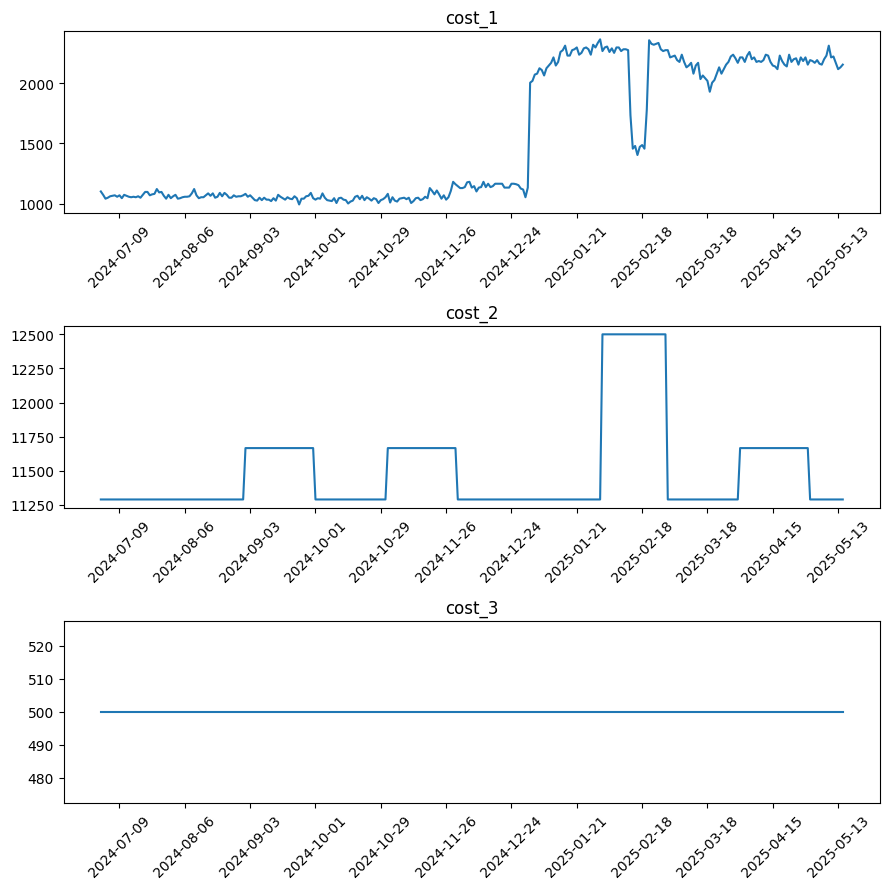

In [81]:
cols = [f'cost_{i}' for i in range(1, 4)]

plt.figure(figsize=(9, 3 * len(cols)))

for idx, col in enumerate(cols):
    ax = plt.subplot(len(cols), 1, idx + 1)
    plt.plot(df.date, df[col])
    plt.title(col)
    # plt.axvline(df.date[184], linestyle='--', color='white')
    
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

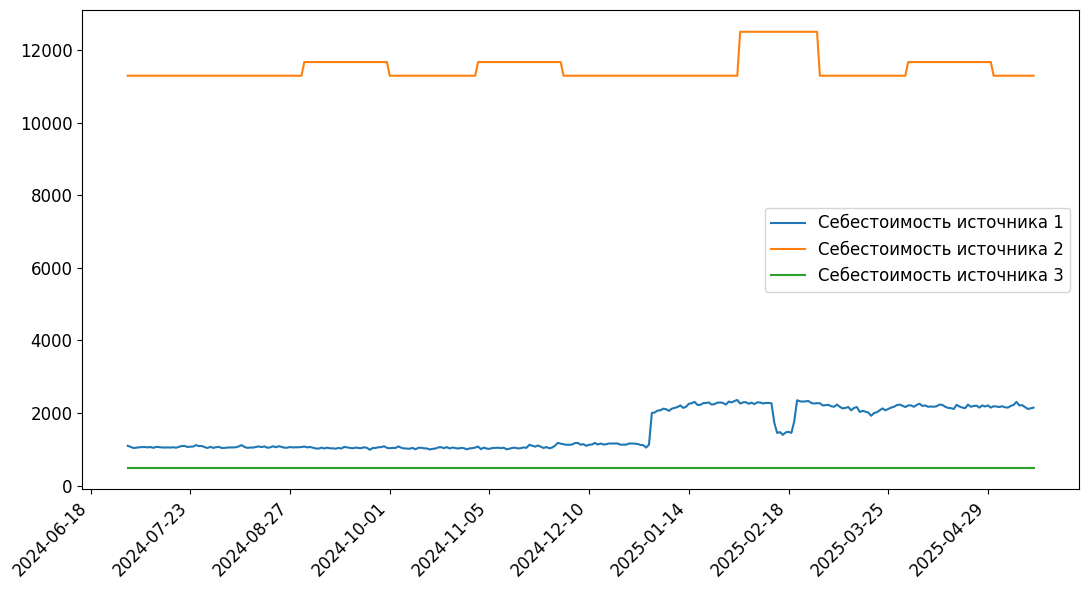

In [ ]:
cols = [f'cost_{i}' for i in range(1, 4)]

fig, ax = plt.subplots(1, 1, figsize=(11, 6))

for idx, col in enumerate(cols):
    ax.plot(df['date'], df[col], zorder=2, label=f'Себестоимость источника {col[-1:]}')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.yticks(fontsize=12)

# plt.title('Динамика себестоймости источников с течением времени')

plt.legend(fontsize=12)
plt.tight_layout()

# plt.savefig('img.jpg')

plt.show()

In [83]:
for idx, cost in enumerate(df[[f'cost_{_}' for _ in range(1, 4)]].median().values):
    print(f'Себестоймость источника {idx + 1}: {cost:.2f}')

Себестоймость источника 1: 1132.00
Себестоймость источника 2: 11290.32
Себестоймость источника 3: 500.00


In [84]:
import numpy as np 


costs = []
N_vals = np.arange(500, 10000, 100)
for N in N_vals:
    df['cost_1'] = df.apply(lambda row: N * row['accuracy_1_%'] * 4 / 100 if row['year'] == 2024 else N * row['accuracy_1_%'] * 7.5 / 100, axis=1)
    df['cost_2'] = df.apply(day_in_month, axis=1)
    df['cost_3'] = N * 0.5 * df['accuracy_3_%']

    costs.append(df[[f'cost_{_}' for _ in range(1, 4)]].median().values)

costs = np.array(costs)

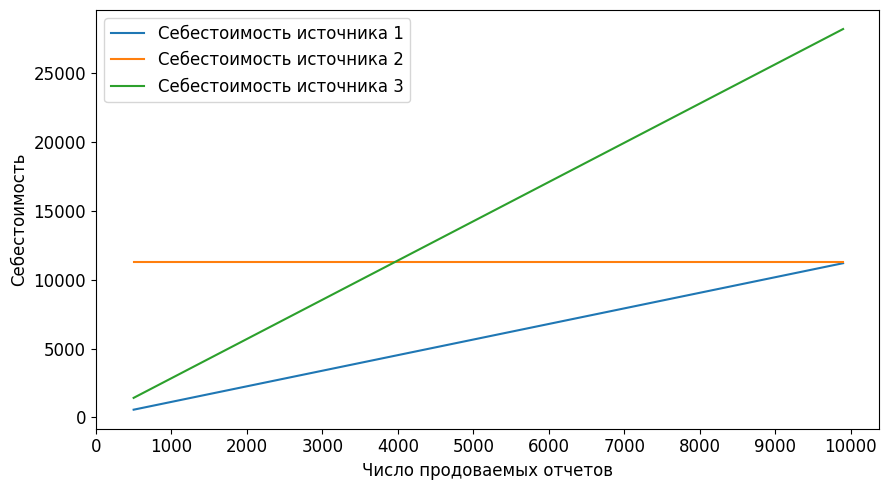

In [85]:
plt.figure(figsize=(9, 5))

for i in range(3):
    plt.plot(N_vals, costs[:, i], label=f'Себестоимость источника {i + 1}')

plt.legend(fontsize=12)

plt.yticks(fontsize=12)
plt.xticks(range(0, 10_000 + 1, 1_000), fontsize=12)

plt.xlabel('Число продоваемых отчетов', fontsize=12)
plt.ylabel('Себестоимость', fontsize=12)

plt.tight_layout()
# plt.savefig('img.jpg')
plt.show()